## One-hot Encoding

In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 데이터 입력
# df = pd.read_csv('../dataset/one_hot_encording_test.csv',header=None)
df = pd.read_csv('../dataset/one_hot_encording_test2.csv', names = ["length", "width", "height", "class_name"])
print(df)

# # 데이터 분류
dataset = df.values
X = dataset[:,0:3].astype(float)
print("data value : {}".format(X))
Y_obj = dataset[:,3]
print("data Label: {}".format(Y_obj))

## case 1)
# 문자열을 숫자로 변환
# Label Encoder는 독립 변수가 아닌 종속 변수(라벨)에 대해 사용한다. 문자열이나 정수로된 라벨 값을  0  ~  K−1 까지의 정수로 변환.
e = LabelEncoder()
e.fit(Y_obj)
print("Label Class String : {}".format(e.classes_))
Y = e.transform(Y_obj)
print("Label Class Int: {}".format(Y))

Y_encoded = tf.keras.utils.to_categorical(Y)
print("One Hot Label Class : {}".format(Y_encoded))

## case 2)
one_hot_label=pd.get_dummies(Y_obj)
print("case 2 one_hot_label : ", one_hot_label)
print(one_hot_label.shape)


   length  width  height class_name
0     5.1    3.5     1.4        car
1     4.9    3.0     1.4        car
2     4.7    3.2     1.3        car
3     4.6    3.1     1.5      truck
4     5.0    3.6     1.4      truck
5     5.4    3.9     1.7      truck
6     4.6    3.4     1.4        bus
7     5.0    3.4     1.5     person
8     4.4    2.9     1.4     person
9     4.9    3.1     1.5        bus
data value : [[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]]
data Label: ['car' 'car' 'car' 'truck' 'truck' 'truck' 'bus' 'person' 'person' 'bus']
Label Class String : ['bus' 'car' 'person' 'truck']
Label Class Int: [1 1 1 3 3 3 0 2 2 0]
One Hot Label Class : [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
case 2 one_hot_label :     bus  car  person  truck
0    0    1       0      0
1    0    1 

## Sonar classification 1

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               6600      
_________________________________________________________________
dense_10 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 61        
Total params: 13,921
Trainable params: 13,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 97ms/step - loss: 1.2623 - binary_accuracy: 0.4479 - val_loss: 0.8128 - val_binary_accuracy: 0.4828
Epoch 2/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8237 - binary_accuracy:

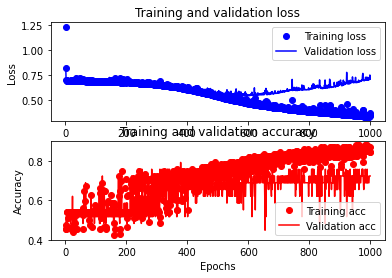

In [4]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# 데이터 입력
df = pd.read_csv('../dataset/sonar_custom.csv',header=None)
tf.random.set_seed(777)

# 데이터 분류
dataset = df.values
X = dataset[:,0:54].astype(float)
Y_obj = dataset[:,54]

X = pd.DataFrame(X)
Y_obj = pd.DataFrame(Y_obj)
# Y_obj =[ R,R,R,R,R,... M,M,M,M,]
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj) #Y_obj =[ R, M,] R=0, M=1
Y = e.transform(Y_obj) ### STRING -> INT R->0, M->1
# Y_obj =[ R,R,R,R,R,... M,M,M,M,]  -> Y=[ 0 ,0 , 0 ,0  ,0 .... 1,1,1,1]

## 원핫 인코딩
Y_one_hot=tf.keras.utils.to_categorical(Y)
# -> Y=[ 0 ,0 , 0 ,0  ,0 .... 1,1,1,1]  (1: M, 0: R)
#  Y_one_hot = [[1,0], [1,0], [1,0], [1,0] ...... , [0,1],[0,1]]
# 0-> [1 0] , 1->[0 1 ] 하지 않음.,
# 이유는 바이너리 클레시피케이션 T/F 로 분류 하는 모델로 학습 하려고 해서 입니다.

# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.3,  shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔
## 학습 셋에서 학습과 검증 데이터로 구분
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔


# train 데이터에서 normalization하기 위한 값들 추출
## train 입력 데이터 열 별로 min, max, mean, std 구하기.
dataset_stats = X_train.describe()
dataset_stats = dataset_stats.transpose()

## data normalization
def standard_norm(x):
    return (x - dataset_stats['mean']) / dataset_stats['std']
## data normalization
def min_max(x):
    return (x - dataset_stats['min']) / (dataset_stats['max']-dataset_stats['min'])
## train data에서 추출한 값들로 train/val/test 데이터 normalization
normed_train_data = 1.2*(min_max(X_train) - 0.5)
normed_val_data = 1.2*(min_max(X_valid) -0.5)
normed_test_data = 1.2*(min_max(X_test) -0.5)


# 모델의 설정
activation=tf.keras.activations.sigmoid
out_activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(54,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x = tf.keras.layers.Dense(60, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=out_activation)(x)

model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.09)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
history=model.fit(normed_train_data, Y_train, epochs=1000, batch_size=100, validation_data=(normed_val_data,Y_valid)) # validation_data=(X_valid,Y_valid)을 추가하여 학습시 검증을 해줌.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 확인하여 무엇을 받고 있는지 확인.
print(history.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# model.evalueate를 통해 테스트 데이터로 정확도 확인하기.
## model.evaluate(X_test, Y_test)의 리턴값은 [loss, binary_acuuracy ]  -> 위 model.compile에서 metrics=[ keras.metrics.binary_accuracy]옵션을 주어서 binary acuuracy 출력됨.
print("\n Test Accuracy: %.4f" % (model.evaluate(normed_test_data, Y_test)[1]))

## 그래프 띄우기
plt.show()



## Sonar classification 2
#### more hidden unit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 55 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

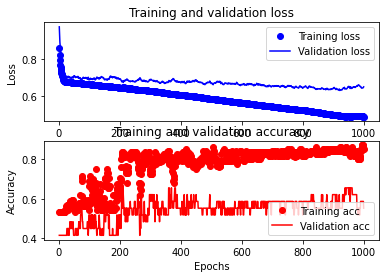

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from focal_loss import BinaryFocalLoss
import numpy as np
import seaborn as sns

# 데이터 입력
df = pd.read_csv('../dataset/sonar_custom.csv',header=None)
tf.random.set_seed(777)

print(df.info())

# 데이터 분류
dataset = df.values
X = dataset[:,0:54].astype(float)
Y_obj = dataset[:,54]

X = pd.DataFrame(1000*X)
Y_obj = pd.DataFrame(Y_obj)
# Y_obj =[ R,R,R,R,R,... M,M,M,M,]
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
## 원핫 인코딩
Y_one_hot=tf.keras.utils.to_categorical(Y)
# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.3,  shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔
## 학습 셋에서 학습과 검증 데이터로 구분
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔

print("train class bin : " , np.bincount(Y_train.flatten().astype('int8')))
print("val class bin : " , np.bincount(Y_valid.flatten().astype('int8')))
print("test class bin : " , np.bincount(Y_test.flatten().astype('int8')))

# 모델의 설정
activation=tf.keras.activations.sigmoid
out_activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(54,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x = tf.keras.layers.Dense(100, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=out_activation)(x)

model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.007)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
history=model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_valid,Y_valid)) # validation_data=(X_valid,Y_valid)을 추가하여 학습시 검증을 해줌.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 확인하여 무엇을 받고 있는지 확인.
print(history.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# model.evalueate를 통해 테스트 데이터로 정확도 확인하기.
## model.evaluate(X_test, Y_test)의 리턴값은 [loss, binary_acuuracy ]  -> 위 model.compile에서 metrics=[ keras.metrics.binary_accuracy]옵션을 주어서 binary acuuracy 출력됨.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

## 그래프 띄우기
plt.show()



## Sonar classification 3
#### more input attribute

train class bin :  [62 54]
val class bin :  [16 13]
test class bin :  [33 30]
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_7 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
Total params: 14,641
Trainable params: 14,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 97ms/step - loss: 1.1878 - binary_accuracy: 0.4670 - val_loss: 1.1571 - val_binary_accuracy: 0.4483
Epoch 2/1000
2/2 [==

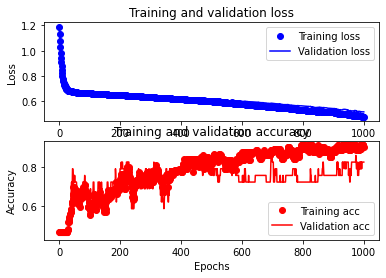

In [3]:
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from focal_loss import BinaryFocalLoss
import numpy as np
import seaborn as sns

# 데이터 입력
df = pd.read_csv('../dataset/sonar.csv',header=None)
tf.random.set_seed(777)
#
# sns.pairplot(df, diag_kind="kde")
# plt.show()


# 데이터 분류
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

X = pd.DataFrame(1000*X)
Y_obj = pd.DataFrame(Y_obj)
# Y_obj =[ R,R,R,R,R,... M,M,M,M,]
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
## 원핫 인코딩
Y_one_hot=tf.keras.utils.to_categorical(Y)
# 전체 데이터에서 학습 데이터와 테스트 데이터로 구분
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.3,  shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔
## 학습 셋에서 학습과 검증 데이터로 구분
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔

print("train class bin : " , np.bincount(Y_train.flatten().astype('int8')))
print("val class bin : " , np.bincount(Y_valid.flatten().astype('int8')))
print("test class bin : " , np.bincount(Y_test.flatten().astype('int8')))

# 모델의 설정
activation=tf.keras.activations.sigmoid
out_activation=tf.keras.activations.sigmoid
input_Layer = tf.keras.layers.Input(shape=(60,))
x = tf.keras.layers.Dense(120, activation=activation)(input_Layer)
x = tf.keras.layers.Dense(60, activation=activation)(x)
Out_Layer= tf.keras.layers.Dense(1, activation=out_activation)(x)

model = tf.keras.models.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


# 모델 컴파일
loss=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.007)
metrics=tf.keras.metrics.binary_accuracy

model.compile(loss=loss,
             optimizer=optimizer,
             metrics=[metrics])

## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
history=model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_valid,Y_valid)) # validation_data=(X_valid,Y_valid)을 추가하여 학습시 검증을 해줌.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 확인하여 무엇을 받고 있는지 확인.
print(history.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# model.evalueate를 통해 테스트 데이터로 정확도 확인하기.
## model.evaluate(X_test, Y_test)의 리턴값은 [loss, binary_acuuracy ]  -> 위 model.compile에서 metrics=[ keras.metrics.binary_accuracy]옵션을 주어서 binary acuuracy 출력됨.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

## 그래프 띄우기
plt.show()

